<a href="https://colab.research.google.com/github/IlyaTrofimov/ML2020-Skoltech/blob/master/seminar_01_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar 1. Machine learning on Titanic data

The notebook provides an intro to the exploratory analysis of the data, data preprocessing and application of machine learning methods.

The notebook is based on kaggle kernel "Titanic: Machine Learning from Disaster"  https://www.kaggle.com/omarelgabry/a-journey-through-titanic by Omar El Gabry.
Data is from a toy competition on kaggle named Titanic.
The goal of the competition is to predict who survived and who died during the sinking of the RMS Titanic.

### Documentation to go through:

* https://docs.python.org/3/
* https://pandas.pydata.org/pandas-docs
* https://matplotlib.org/contents.html
* https://docs.scipy.org/doc/
* http://scikit-learn.org/stable/documentation.html

### Some additional info:


* http://www.scipy-lectures.org/
* https://www.kaggle.com/
* https://pydata.org/

In [0]:
# importing data processing tools: pandas and numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Load data

In [47]:
!git clone https://github.com/IlyaTrofimov/ML2020-Skoltech.git

fatal: destination path 'ML2020-Skoltech' already exists and is not an empty directory.


In [48]:
!ls ML2020-Skoltech/titanic/

gender_submission.csv  test.csv  train.csv


In [0]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("ML2020-Skoltech/titanic//train.csv", index_col='PassengerId')

# Look through the data

In [74]:
# preview the data
titanic_dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# list the features
print(titanic_dataframe.keys())

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [76]:
# column selection by name
titanic_dataframe['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [77]:
# row selection by name
titanic_dataframe.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [78]:
# column selection by index
titanic_dataframe.iloc[:, 0]

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [79]:
# row selection by index
titanic_dataframe.iloc[0, :]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

### Hints and tips

You can use ```%time``` or ```tqdm``` to track the code timing.

Note that ```pandas``` is column oriented data structure.


In [80]:
%time titanic_dataframe['Fare'].mean()

CPU times: user 426 µs, sys: 0 ns, total: 426 µs
Wall time: 412 µs


32.2042079685746

In [81]:
data_titanic_transpose = titanic_dataframe.T
%time data_titanic_transpose.loc['Fare'].mean()

CPU times: user 826 µs, sys: 0 ns, total: 826 µs
Wall time: 835 µs


32.2042079685746

In [82]:
from tqdm import tqdm
for i in tqdm(range(100000000)):
  pass

100%|██████████| 100000000/100000000 [00:21<00:00, 4590600.89it/s]


## Data Dictionary

| Variable | Definition | Key |
| ------------- |:-------------|: -----|
| survival | Survival   | 0 = No, 1 = Yes | 
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number  | |
| fare   | Passenger fare | |
| cabin  | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [83]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [84]:
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Hints and tips

Write ```?``` after the function you are interested in or just press ``` Shift + Tab```  for the function short referense. 

Double ``` Shift + Tab``` will expand to the full reference.

In [0]:
# call information for the function 
titanic_dataframe.drop?

In [109]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_dataframe.drop(['Name','Ticket'], axis=1, inplace=True)
titanic_dataframe.info()

KeyError: ignored

In [86]:
for column_name in titanic_dataframe.columns:
    print(column_name, 'null', titanic_dataframe[column_name].isnull().sum())

# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_dataframe.drop("Cabin", axis=1, inplace=True)

Survived null 0
Pclass null 0
Name null 0
Sex null 0
Age null 177
SibSp null 0
Parch null 0
Ticket null 0
Fare null 0
Cabin null 687
Embarked null 2


In [87]:
# Count various embarked values
print(titanic_dataframe["Embarked"].value_counts())

# Fill the two missing values with the most occurred value, which is "S".
titanic_dataframe["Embarked"] = titanic_dataframe["Embarked"].fillna("S")
print(titanic_dataframe["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


### Tasks:

1. What is the mean value and stds of ages for every passanger class?
2. In what port of embarked the absolute difference between the amount men and women was the greatest?
3. What is a number of NaN values in every column?
4. Replace NaN values in age with median value and calculate the std value.

# Plotting

In [0]:
# visualization tools: matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0, 0.5, 'Fare')

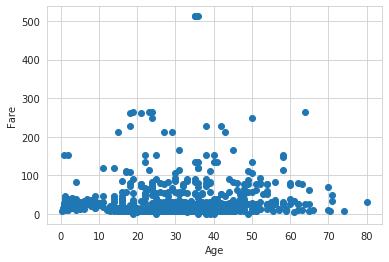

In [89]:
# Simple plot
x = titanic_dataframe['Age']
y = titanic_dataframe['Fare']
plt.plot(x, y, 'o')
plt.xlabel('Age')
plt.ylabel('Fare')

![matplotlib_figure_axes_axis.png](attachment:matplotlib_figure_axes_axis.png)

In [0]:
# Catplot plot represents share of survived passengers for different embarkment ports
sns.catplot?

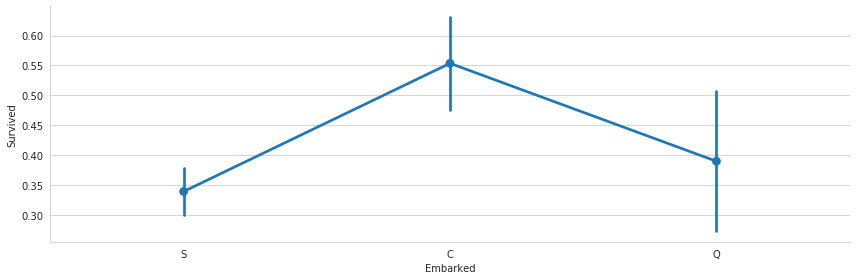

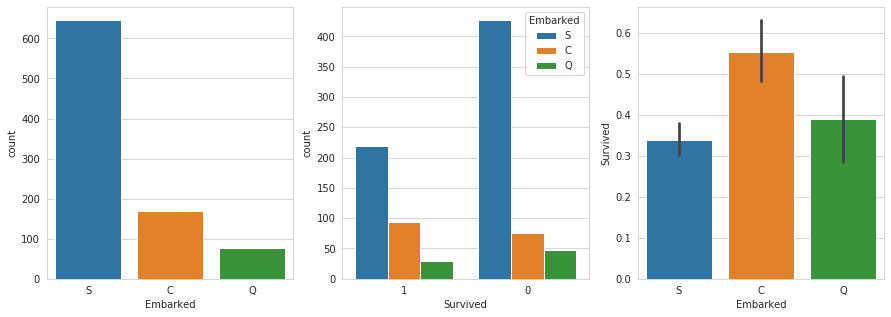

In [91]:
sns.catplot(x = 'Embarked', y = 'Survived', data=titanic_dataframe, height=4, aspect=3, kind = 'point')

figure_handle, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=titanic_dataframe, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_dataframe, order=[1, 0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_dataframe[["Embarked", "Survived"]], order=['S','C','Q'], ax=axis3)

![1_3hdYEX5eixaV4F3wT5OmBg.png](attachment:1_3hdYEX5eixaV4F3wT5OmBg.png)

In [0]:
# consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_dataframe['Embarked'])

In [93]:
embark_dummies_titanic

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [0]:
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(embark_dummies_titanic)

titanic_dataframe.drop(['Embarked'], axis=1, inplace=True)

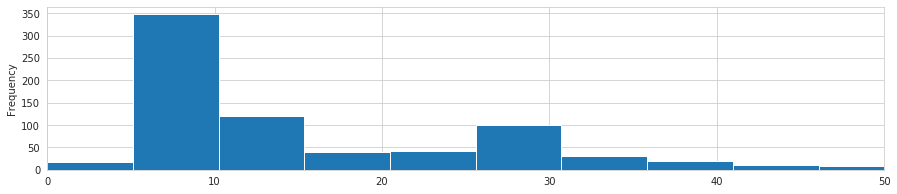

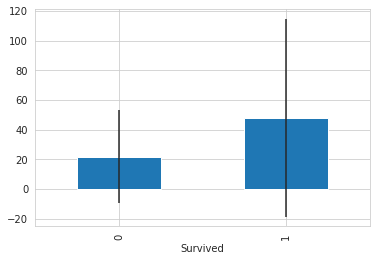

In [95]:
# Examine fare variable

# convert from float to int
titanic_dataframe['Fare'] = titanic_dataframe['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 0]
fare_survived = titanic_dataframe["Fare"][titanic_dataframe["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_dataframe['Fare'].plot(kind='hist', figsize=(15, 3), bins=100, xlim=(0, 50))

std_fare.index.names = ["Survived"]
avgerage_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare, kind='bar', legend=False)

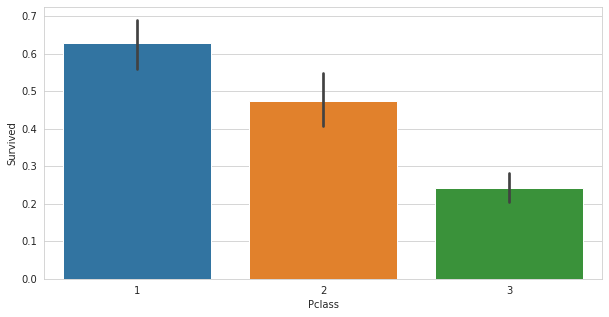

In [96]:
# Do the same thing for pclass variable with no confidence interval visible
print(titanic_dataframe[["Pclass", "Survived"]].groupby(['Pclass'], as_index=True))
# adjust the figure size
plt.figure(figsize=[10,5])
sns.barplot(x='Pclass', y='Survived', data=titanic_dataframe[["Pclass", "Survived"]], order=[1, 2, 3])

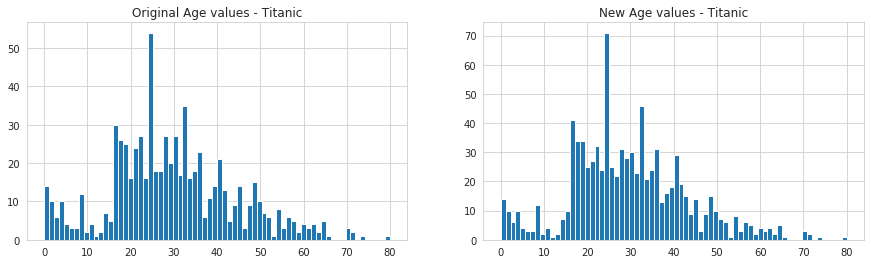

In [97]:
# Age 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()
count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
random_ages = np.random.randint(average_age_titanic - std_age_titanic, 
                                average_age_titanic + std_age_titanic, 
                                size=count_nan_age_titanic)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_dataframe['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages

# convert from float to int
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

# plot new Age Values
titanic_dataframe['Age'].hist(bins=70, ax=axis2)

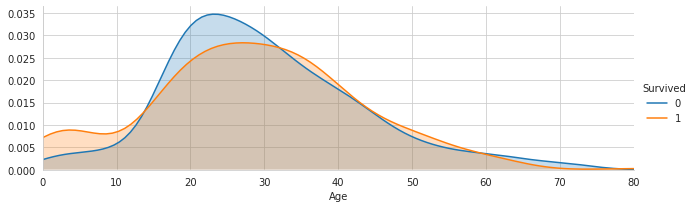

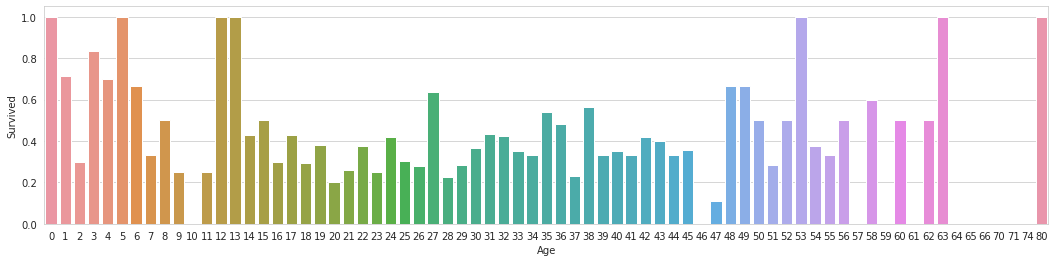

In [98]:
# .... continue with plotting of Age column

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_dataframe, hue="Survived", aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic_dataframe['Age'].max()))
facet.add_legend()

# average survived passengers by age
figure_handle, axis1 = plt.subplots(1, 1, figsize=(18, 4))
average_age = titanic_dataframe[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [110]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column that represents if a passenger had any family member aboard or not,
# Meaning, if having any family member (whether parent, brother, ...etc) increases chances of Survival or not.
titanic_dataframe['Family'] = titanic_dataframe["Parch"] + titanic_dataframe["SibSp"]
titanic_dataframe.loc[titanic_dataframe['Family'] > 0, 'Family'] = 1
titanic_dataframe.loc[titanic_dataframe['Family'] == 0, 'Family'] = 0

# drop Parch & SibSp
titanic_dataframe.drop(['SibSp','Parch'], axis=1, inplace=True)

KeyError: ignored

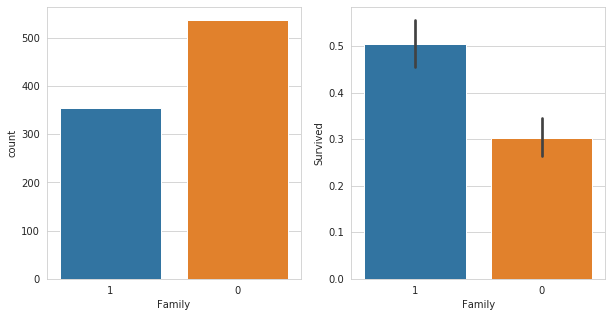

In [101]:
# plot Family
figure_handle, (axis1, axis2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

sns.countplot(x='Family', data=titanic_dataframe, order=[1, 0], ax=axis1)
axis1.set_xticklabels(["With Family", "Alone"], rotation=0)

# average of survived for those who had/didn't have any family member
sns.barplot(x='Family', y='Survived', data=titanic_dataframe[["Family", "Survived"]], order=[1, 0], ax=axis2)

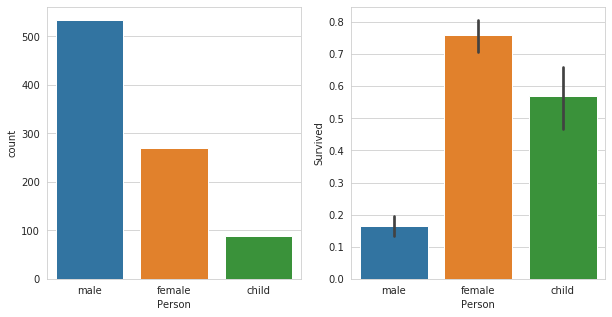

In [102]:
# Sex variable

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

titanic_dataframe['Person'] = titanic_dataframe[['Age','Sex']].apply(get_person, axis=1)

# No need to use Sex column since we created Person column
titanic_dataframe.drop(['Sex'], axis=1, inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic = pd.get_dummies(titanic_dataframe['Person'])
person_dummies_titanic.columns = ['Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(person_dummies_titanic)

figure_handle, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Person', data=titanic_dataframe, ax=axis1)

# average of survived for each Person(male, female, or child)
sns.barplot(x='Person', y='Survived', data=titanic_dataframe[["Person", "Survived"]], 
            ax=axis2, order=['male', 'female', 'child'])

# we don't need person variable after introduction of the corresponding dummy variables
titanic_dataframe.drop(['Person'], axis=1, inplace=True)

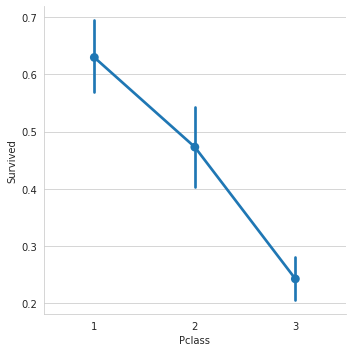

In [103]:
# Pclass
sns.catplot('Pclass', 'Survived', order=[1, 2, 3], data=titanic_dataframe, height=5, kind = 'point')

# The goal is to create dummy variables for class and joint it to the initial dataframe
# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_dataframe['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

titanic_dataframe = titanic_dataframe.join(pclass_dummies_titanic)


1. Is distribution of age similar for men and women? Check it with QQ-plot.
2. Compare Age distribution for all three classes.

## It's time for Machine learning!

![MLearning](https://media.giphy.com/media/BdrSy2gqURFEk/giphy.gif)

In [0]:
# machine learning tools: various methods from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
train, test = train_test_split(titanic_dataframe, train_size=0.5, test_size=0.5)

In [0]:
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']
test_x = test.drop(['Survived'], axis=1)
test_y = test['Survived']

In [114]:
# Logistic Regression

logistic_regression_model = LogisticRegression(solver='liblinear')
logistic_regression_model.fit(train_x, train_y)
train_prediction = logistic_regression_model.predict(train_x)
test_prediction = logistic_regression_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8292134831460675
Test Accuracy: 0.7802690582959642


In [115]:
# Support Vector Machines

svm_model = SVC(C=1.0, gamma=0.5)
svm_model.fit(train_x, train_y)
train_prediction = svm_model.predict(train_x)
test_prediction = svm_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9617977528089887
Test Accuracy: 0.6614349775784754


In [116]:
# Random Forests

random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(train_x, train_y)
train_prediction = random_forest_model.predict(train_x)
test_prediction = random_forest_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9640449438202248
Test Accuracy: 0.804932735426009


In [117]:
# K nearest neighbours 

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_x, train_y)
train_prediction = knn_model.predict(train_x)
test_prediction = knn_model.predict(test_x)
train_accuracy = accuracy_score(train_y, train_prediction)
test_accuracy = accuracy_score(test_y, test_prediction)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9820224719101124
Test Accuracy: 0.6636771300448431


##### What is the most effective pair of features which gives the best test accuracy?